In [173]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy

In [174]:
def featureNormalize(X):
    X=(X-np.mean(X,axis=0))
    X=X/np.std(X,axis=0)
    return X

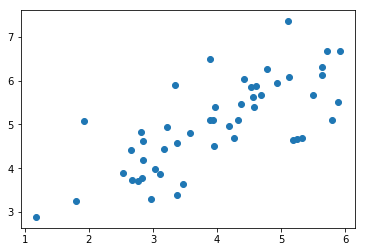

First Principle component :  [-0.70710678 -0.70710678]


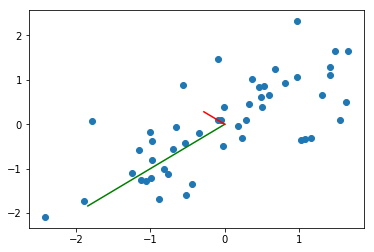

The first value of reduce is :  [1.49631261]
The first value of recoverd is :  [-1.05805279 -1.05805279]


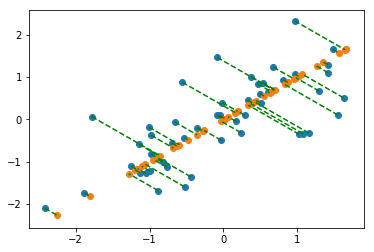

In [175]:
X=sio.loadmat('../machine-learning-ex7/ex7/ex7data1.mat')['X']
plt.scatter(X[:,0],X[:,1])
plt.show()
X.shape

K=1
Xfe=featureNormalize(X)
cov=(1.0/Xfe.shape[0])*np.dot(Xfe.T,Xfe)
u,S,v=scipy.linalg.svd(cov)
U1=u[:K][0]
U2=u[K]
print('First Principle component : ',U1)
ureduce = U1


plt.scatter(Xfe[:,0],Xfe[:,1])

plt.plot([0,1.5*S[0]*U1[0]],[0,1.5*S[0]*U1[1]],'g')
plt.plot([0,1.5*S[1]*U2[0]],[0,1.5*S[1]*U2[1]],'r')

plt.show()

# here 1.5 is used to increace magnitude and S is eigen vector

Z = np.dot(Xfe,ureduce.reshape(-1,1))
print('The first value of reduce is : ',Z[0])
Xapprx=np.dot(Z,ureduce.reshape(1,-1))
print('The first value of recoverd is : ',Xapprx[0])

plt.scatter(Xfe[:,0],Xfe[:,1])
plt.scatter(Xapprx[:,0],Xapprx[:,1])

for i in range(Xfe.shape[0]):
    plt.plot([Xfe[i][0],Xapprx[i][0]],[Xfe[i][1],Xapprx[i][1]],'g--')
plt.show()

# Face DAta

In [208]:
def plot_n_pix(X,n,pix1,pix2):
    k=0
    for i in range(0,n):
        k=X[i*n:((i+1)*n),:]
        if i==0:
            ll=k.reshape(n*pix1,pix2).T
        else:
            ll=np.vstack((ll,k.reshape(n*pix1,pix2).T))
    plt.imshow(ll,cmap='gray')
    plt.show()

In [218]:
def load_data(f):
    s=sio.loadmat(f)
    X=s['X']
    
    plot_n_pix(X,8,32,32)
    return X

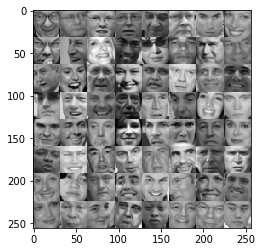

(5000, 1024) (5000, 1024) (5000, 100)


In [221]:
K=100
X=load_data('../machine-learning-ex7/ex7/ex7faces.mat')
Xfe=featureNormalize(X)


cov=(1.0/Xfe.shape[0])*np.dot(Xfe.T,Xfe)
u,S,v=scipy.linalg.svd(cov)
U1=u[:K]
U2=u[K]
ureduce = U1


Z = np.dot(Xfe,ureduce.reshape(-1,K))
Xapprx=np.dot(Z,ureduce.reshape(K,-1))


print(Xfe.shape,Xapprx.shape,Z.shape)

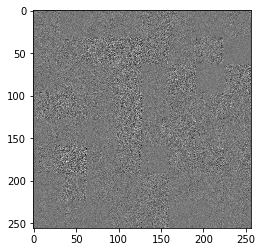

In [222]:
plot_n_pix(Xapprx,8,32,32)